In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata 
print(breast_cancer_wisconsin_original.metadata)

# variable information 
print(breast_cancer_wisconsin_original.variables) 

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [8]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [14]:
print(type(y))

<class 'pandas.core.frame.DataFrame'>


In [16]:
len(X), len(y)

(699, 699)

# Import tools

In [25]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# EDA

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 49.3 KB


In [17]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   699 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB


In [21]:
X, y

(     Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
 0                  5                        1                         1   
 1                  5                        4                         4   
 2                  3                        1                         1   
 3                  6                        8                         8   
 4                  4                        1                         1   
 ..               ...                      ...                       ...   
 694                3                        1                         1   
 695                2                        1                         1   
 696                5                       10                        10   
 697                4                        8                         6   
 698                4                        8                         8   
 
      Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
 0               

In [13]:
X.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [80]:
flags = X.isna()
flags.sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
dtype: int64

### Merge feature and the target via index

In [18]:
data = X.copy()

In [19]:
data_new = pd.merge(data, y, left_index=True, right_index=True)

In [20]:
data_new

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [22]:
data_new.keys()[-1]

'Class'

## We find the missing value, so that we have to do the data preprocessing

In [24]:
data_new.Bare_nuclei.agg(['mean', 'median', 'std', 'max', 'min'])

mean       3.544656
median     1.000000
std        3.643857
max       10.000000
min        1.000000
Name: Bare_nuclei, dtype: float64

<Axes: xlabel='Bare_nuclei'>

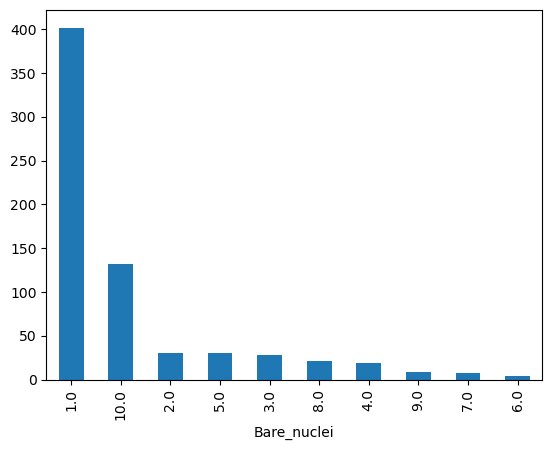

In [50]:
data_new.Bare_nuclei.value_counts().plot(kind='bar')

In [65]:
import matplotlib.pyplot as plt

def plot_pdf(data: pd.DataFrame, attribute: str):
    df = pd.DataFrame(data)

    df_mean = np.mean(df[attribute])
    df_std = np.std(df[attribute])

    # Calculating probability density function (PDF)
    pdf = stats.norm.pdf(df[attribute].sort_values(), df_mean, df_std)

    plt.plot(df[attribute].sort_values(), pdf)
    plt.xlim([-10, 15])
    plt.xlabel(attribute, size=12)
    plt.ylabel('density', size=12)
    plt.grid(True, alpha=0.3, linestyle="--")
    plt.show()

In [45]:
def plot_gaussian_func(data: pd.DataFrame, attribute: str):
    mu = np.mean(data[attribute])
    sigma = np.std(data[attribute])
    splits = 2

    # define the normal distribution and PDF
    dist = stats.norm(loc=mu, scale=sigma)
    x = np.linspace(dist.ppf(.001), dist.ppf(.999))
    y = dist.pdf(x)

    # calculate PPFs
    step = 1 / splits
    quantiles = np.arange(step, 1.0 - step / 2, step)
    ppfs = dist.ppf(quantiles)  # boundaries

    # plot results
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(x, y, color='k')
    for i, ppf in enumerate(ppfs):
        ax.axvline(ppf, color=f'C{i}', label=f'{quantiles[i]:.3f}: {ppf:.1f}')
    ax.legend()
    plt.show()

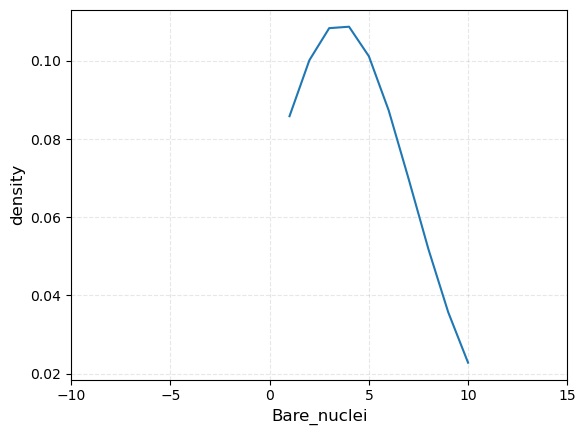

In [79]:
plot_pdf(data_new, 'Bare_nuclei')

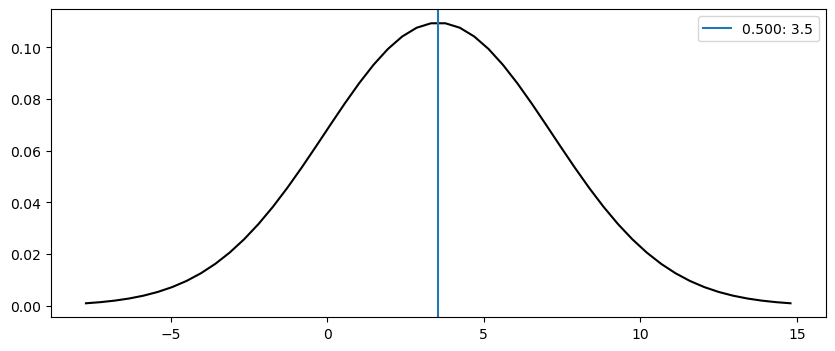

In [46]:
plot_gaussian_func(data_new, 'Bare_nuclei')

In [43]:
flag = (data_new['Bare_nuclei'] < 2.6)
data_new.loc[flag, 'Bare_nuclei'].count()

432

In [36]:
flag2 = (data_new['Bare_nuclei'] >= 2.0)
flag3 = (data_new['Bare_nuclei'] <= 5.1)
data_new.loc[(flag2 & flag3), 'Bare_nuclei'].count()

107

In [44]:
flag4 = (data_new['Bare_nuclei'] > 2.6)
data_new.loc[flag4, 'Bare_nuclei'].count()

251

## After using PDF and PPF for preprocessing, the result seem to dominate on value 1. Therefore, I will use standardization for the data.

### But we have to split the dataset for train and test

In [57]:
from sklearn.model_selection import train_test_split

labels = data_new['Class']

X_train, X_test = train_test_split(data_new,
                                                    train_size=0.6,
                                                    random_state=123,
                                                    stratify=labels)
X_train.count(), X_test.count()

(Clump_thickness                419
 Uniformity_of_cell_size        419
 Uniformity_of_cell_shape       419
 Marginal_adhesion              419
 Single_epithelial_cell_size    419
 Bare_nuclei                    406
 Bland_chromatin                419
 Normal_nucleoli                419
 Mitoses                        419
 Class                          419
 dtype: int64,
 Clump_thickness                280
 Uniformity_of_cell_size        280
 Uniformity_of_cell_shape       280
 Marginal_adhesion              280
 Single_epithelial_cell_size    280
 Bare_nuclei                    277
 Bland_chromatin                280
 Normal_nucleoli                280
 Mitoses                        280
 Class                          280
 dtype: int64)

In [51]:
# นิยามฟังก์ชันที่เองชื่อ normalize
def normalize(col):
    # ตัวแปรชื่อ col ที่รับมาจาก apply จะเป็นเพียงคอลัมน์ ๆ หนึ่งของ X_train
    return (col - col.mean())/col.std(ddof=0) # Standardization

### Normalize X_test and X_train

In [96]:
new_X_train = X_train.apply(normalize)

In [97]:
new_X_train

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
203,0.217267,-0.692210,-0.752721,-0.629560,-0.530089,-0.715751,-0.157888,-0.614245,-0.349261,-0.723627
608,0.217267,2.204929,2.250995,2.402457,3.088768,1.749239,2.736402,-0.614245,-0.349261,1.381927
314,-1.222019,-0.692210,-0.752721,-0.629560,-0.982446,-0.715751,-0.571358,-0.614245,-0.349261,-0.723627
477,-0.142555,-0.692210,-0.752721,-0.629560,-0.530089,-0.715751,-0.984828,-0.614245,-0.349261,-0.723627
70,0.217267,-0.692210,-0.085229,-0.629560,-0.530089,-0.715751,-0.571358,-0.614245,-0.349261,-0.723627
...,...,...,...,...,...,...,...,...,...,...
176,-0.862197,-0.692210,-0.752721,-0.629560,-0.530089,-0.715751,-0.157888,-0.614245,-0.349261,-0.723627
258,-0.502376,-0.692210,-0.752721,-0.629560,-0.530089,-0.715751,-0.157888,-0.614245,-0.349261,-0.723627
32,2.016374,1.239216,1.249756,0.044222,2.184054,0.379800,1.495992,0.353306,0.901511,1.381927
553,-0.142555,0.273503,-0.418975,-0.629560,-0.530089,0.379800,-0.571358,-0.614245,0.276125,-0.723627


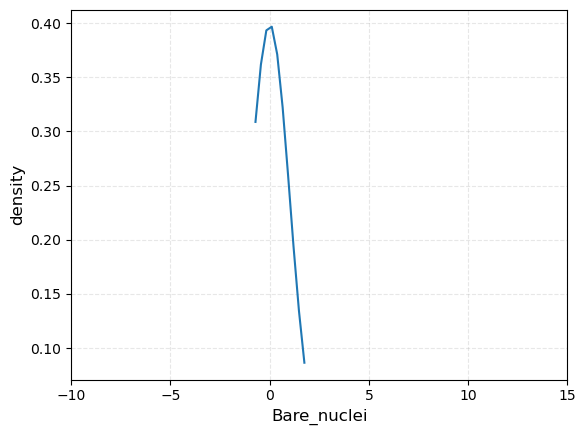

In [66]:
plot_pdf(new_X_train, 'Bare_nuclei')

### After plotting gaussian function, we know that the normalize is doing its work

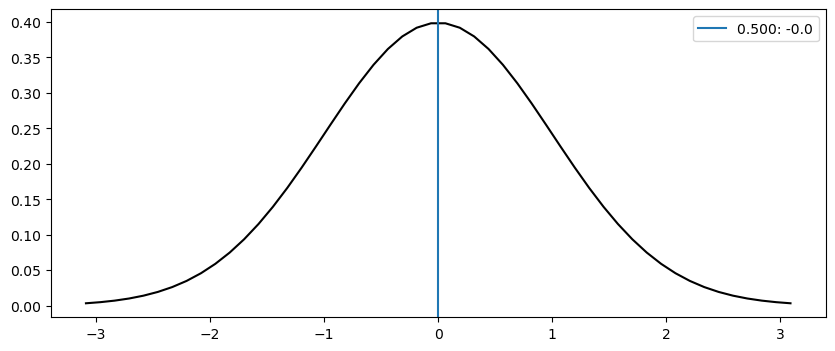

In [67]:
plot_gaussian_func(new_X_train, 'Bare_nuclei')

In [74]:
flag5 = (new_X_train['Bare_nuclei'] < 0.0)
new_X_train.loc[flag5, 'Bare_nuclei'].count(), new_X_train.loc[~flag5, 'Bare_nuclei'].count()

(267, 139)

In [75]:
new_X_test = X_test.apply(normalize)

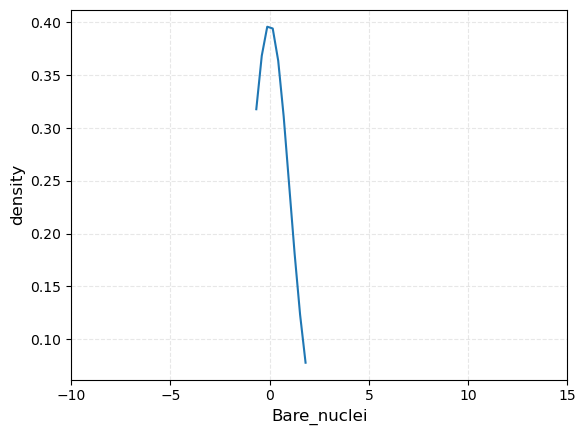

In [76]:
plot_pdf(new_X_test, 'Bare_nuclei')

In [78]:
flag6 = (new_X_test['Bare_nuclei'] < 0.0)
new_X_test.loc[flag6, 'Bare_nuclei'].count(), new_X_test.loc[~flag6, 'Bare_nuclei'].count()

(193, 84)

In [84]:
new_X_test

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
173,0.541130,2.326362,2.344188,2.729381,2.130759,1.808930,2.632460,2.416180,2.866099,1.373535
558,-0.855335,-0.712742,-0.729357,-0.642207,-0.579063,-0.674364,-0.618207,-0.608546,-0.339658,-0.728049
515,-0.157102,2.326362,0.295158,1.605518,-0.127426,1.808930,2.226127,2.416180,-0.339658,1.373535
280,-0.506219,-0.712742,-0.729357,-0.642207,-0.579063,-0.674364,-0.211874,-0.608546,-0.339658,-0.728049
234,-0.506219,-0.037386,-0.387852,-0.642207,-0.127426,-0.674364,-0.211874,1.071857,-0.339658,-0.728049
...,...,...,...,...,...,...,...,...,...,...
443,-1.204451,-0.712742,-0.729357,-0.642207,-0.579063,-0.398443,-1.024541,-0.608546,-0.339658,-0.728049
454,-0.855335,-0.037386,-0.729357,-0.642207,-0.127426,-0.674364,-1.024541,-0.608546,-0.339658,-0.728049
464,-0.157102,-0.712742,-0.729357,-0.642207,-0.579063,-0.674364,-1.024541,-0.608546,-0.339658,-0.728049
5,1.239363,2.326362,2.344188,1.980139,1.679122,1.808930,2.226127,1.407938,-0.339658,1.373535


### After standardizing, I get that median = 1 is very dominance for 'Bare_nuclei' value. Thus using the mean value for missing feature is seem to be a good appaorch.

In [99]:
flag7 = (new_X_train.Bare_nuclei.isna())

203    False
608    False
314    False
477    False
70     False
       ...  
176    False
258    False
32     False
553    False
399    False
Name: Bare_nuclei, Length: 419, dtype: bool

In [102]:
mean = new_X_train.Bare_nuclei.agg(['mean'])

In [104]:
new_X_train.fillna(mean, inplace=True)

In [105]:
new_X_train

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
203,0.217267,-0.692210,-0.752721,-0.629560,-0.530089,-0.715751,-0.157888,-0.614245,-0.349261,-0.723627
608,0.217267,2.204929,2.250995,2.402457,3.088768,1.749239,2.736402,-0.614245,-0.349261,1.381927
314,-1.222019,-0.692210,-0.752721,-0.629560,-0.982446,-0.715751,-0.571358,-0.614245,-0.349261,-0.723627
477,-0.142555,-0.692210,-0.752721,-0.629560,-0.530089,-0.715751,-0.984828,-0.614245,-0.349261,-0.723627
70,0.217267,-0.692210,-0.085229,-0.629560,-0.530089,-0.715751,-0.571358,-0.614245,-0.349261,-0.723627
...,...,...,...,...,...,...,...,...,...,...
176,-0.862197,-0.692210,-0.752721,-0.629560,-0.530089,-0.715751,-0.157888,-0.614245,-0.349261,-0.723627
258,-0.502376,-0.692210,-0.752721,-0.629560,-0.530089,-0.715751,-0.157888,-0.614245,-0.349261,-0.723627
32,2.016374,1.239216,1.249756,0.044222,2.184054,0.379800,1.495992,0.353306,0.901511,1.381927
553,-0.142555,0.273503,-0.418975,-0.629560,-0.530089,0.379800,-0.571358,-0.614245,0.276125,-0.723627


# NEED TO REDO THE SPLIT TEST & TRAIN THEN FILLNA WITH MEAN OF THE DATA ALSO DO NOT NORMALIZE THE CLASS